In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

Path.cwd()

PosixPath('/home/francesco/FisMedLab/Silici/Secondo Giorno/siliciGiorno2')

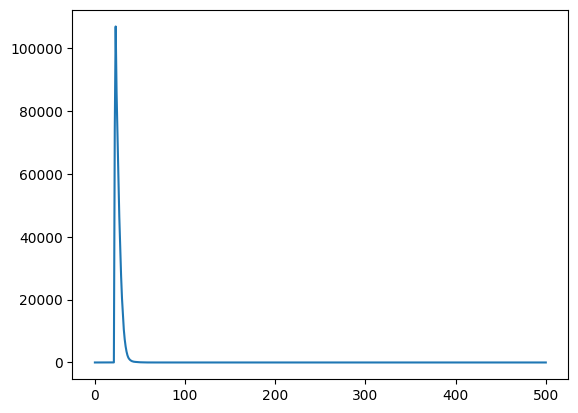

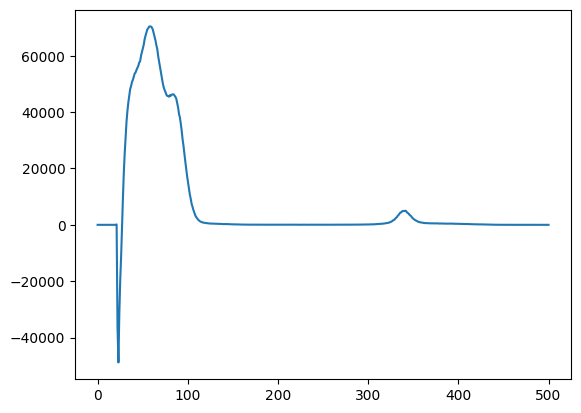

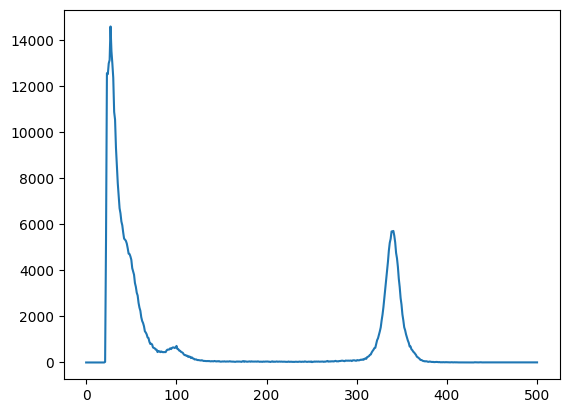

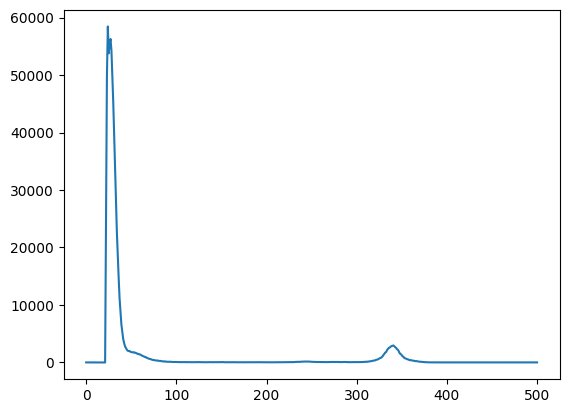

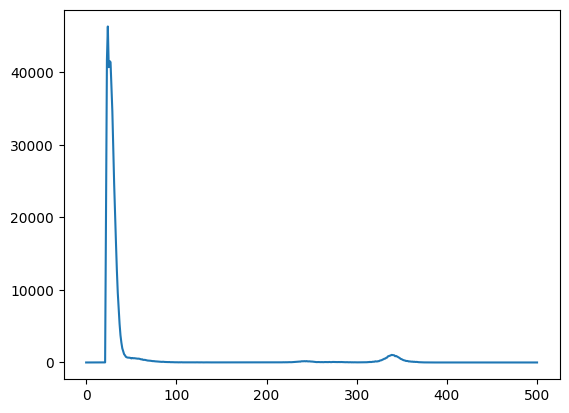

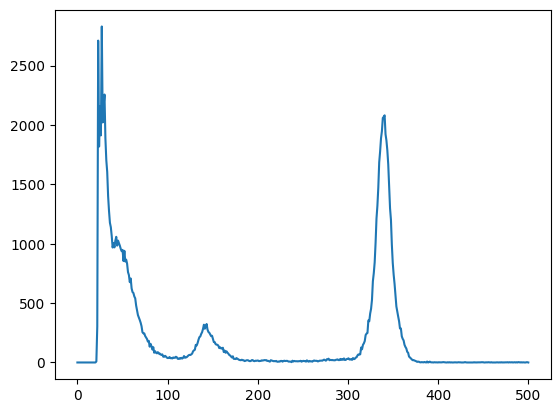

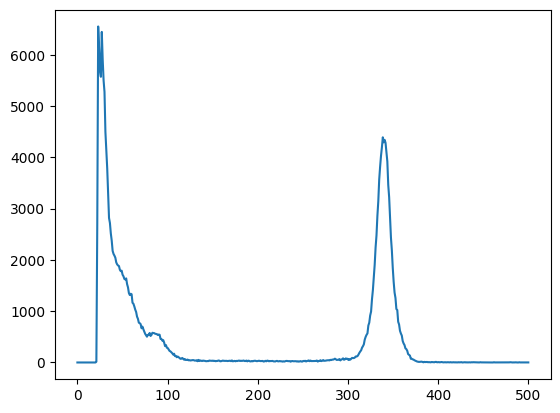

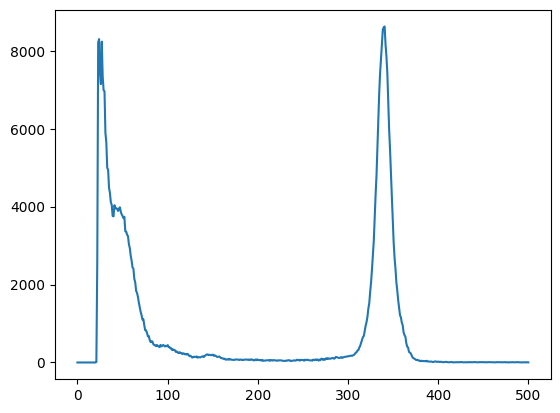

In [16]:
Pb= np.loadtxt('Am241_12V_180s_50micronPb82.Spe')
Mo= np.loadtxt('Am241_12V_180s_100micronMo42.Spe')
Gd1= np.loadtxt('Am241_12V_180s_120micronGd64.Spe')
Gd2= np.loadtxt('Am241_12V_180s_240micronGd64.Spe')
Sn= np.loadtxt('Am241_12V_180s_250micronSn50.Spe')
Zr= np.loadtxt('Am241_12V_180s_250micronZr40.Spe')
Am= np.loadtxt('Am241_12V_180s.Spe')
noise=np.loadtxt('rumore12V.Spe')

x=np.linspace(0,500,500)

plt.plot(x,noise[0:500])
plt.show()
plt.plot(x,Pb[0:500]-noise[0:500])
plt.show()

plt.plot(x,Mo[0:500]-noise[0:500])
plt.show()
plt.plot(x,Gd1[0:500]-noise[0:500])
plt.show()
plt.plot(x,Gd2[0:500]-noise[0:500])
plt.show()
plt.plot(x,Sn[0:500]-noise[0:500])
plt.show()
plt.plot(x,Zr[0:500]-noise[0:500])
plt.show()
plt.plot(x,Am[0:500]-noise[0:500])
plt.show()

Fit picco a 60 keV Americio

Chi-squared: 35.37
Reduced chi-squared: 0.24
Energy resolution: 10.84%


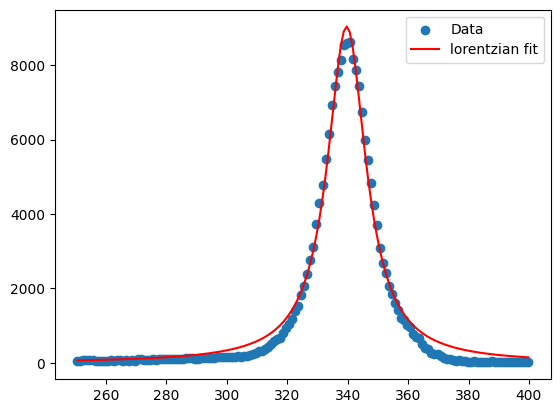

In [34]:
from scipy.optimize import curve_fit

# Define the lorentzian function
def lorentzian(x, amplitude, mean, fwhm):
    return (amplitude * (fwhm / 2) ** 2) / ((x - mean) ** 2 + (fwhm / 2) ** 2)

# Load the data and create the x and y arrays
y = Am[250:400]
x1 = x[250:400]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [9000, 340, 20]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian, x1, y, p0=p0)
fit_y = lorentzian(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = fwhm / coeff[1] * 100  # Convert to percentage
print('Energy resolution: {:.2f}%'.format(resolution))

# Add a legend and show the plot
plt.legend()
plt.show()
